Using matplotlib backend: module://matplotlib_inline.backend_inline
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5018 - loss: 4.5160 - val_accuracy: 0.9402 - val_loss: 0.2249
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8279 - loss: 0.5752 - val_accuracy: 0.9557 - val_loss: 0.1669
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8677 - loss: 0.4341 - val_accuracy: 0.9642 - val_loss: 0.1348
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8879 - loss: 0.3688 - val_accuracy: 0.9682 - val_loss: 0.1129
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9042 - loss: 0.3201 - val_accuracy: 0.9718 - val_loss: 0.1072
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1374
Test loss: 0.114108145236969
Test accuracy: 0.9672999978065491


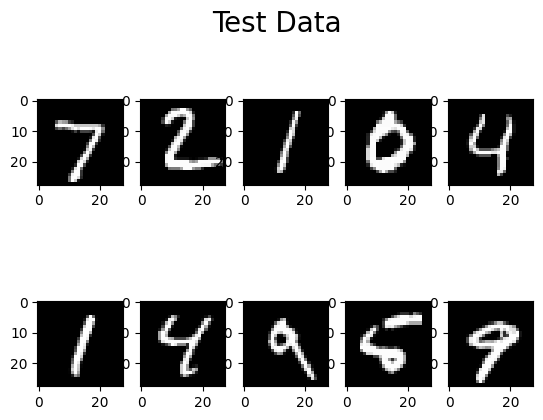

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[7 2 1 0 4 1 4 9 5 9]


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.utils import to_categorical,plot_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=128,epochs=5,verbose=1,validation_split=0.2)
scores=model.evaluate(X_test,y_test,verbose=1)
print(f'Test loss: {scores[0]}')
print(f'Test accuracy: {scores[1]}')

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape((28,28)),'gray')
plt.suptitle('Test Data',fontsize=20)
plt.show()
pred=np.argmax(model.predict(X_test[0:10]),axis=1)
print(pred)